In [56]:
import pandas as pd
import numpy as np
import hist
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)
import glob
import uproot
import awkward as ak

In [33]:
files = glob.glob("/grid_mnt/data__data.polcms/cms/vernazza/cmt/Categorization/ul_2018_ZZ_v12/tt_*/cat_ZZ_elliptical_cut_90_sr/prod_240318/data_*.root")

In [34]:
df = uproot.concatenate(files, filter_name=["event", "b_2_hhbtag"], library="pd")
df

,event,b_2_hhbtag
0,27114218,1.889118e-07
1,27114238,5.239783e-01
2,27114317,7.211299e-01
3,27114322,3.798968e-08
4,27114360,1.000046e+00
...,...,...
3392973,409206010,4.466145e-01
3392974,409206126,5.728736e-03
3392975,409206313,8.199547e-01
3392976,429926065,6.766854e-01


/opt/exp_soft/llr/python/3.11.8/el7/lib/python3.11/site-packages/mplhep/plot.py:592: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticks)


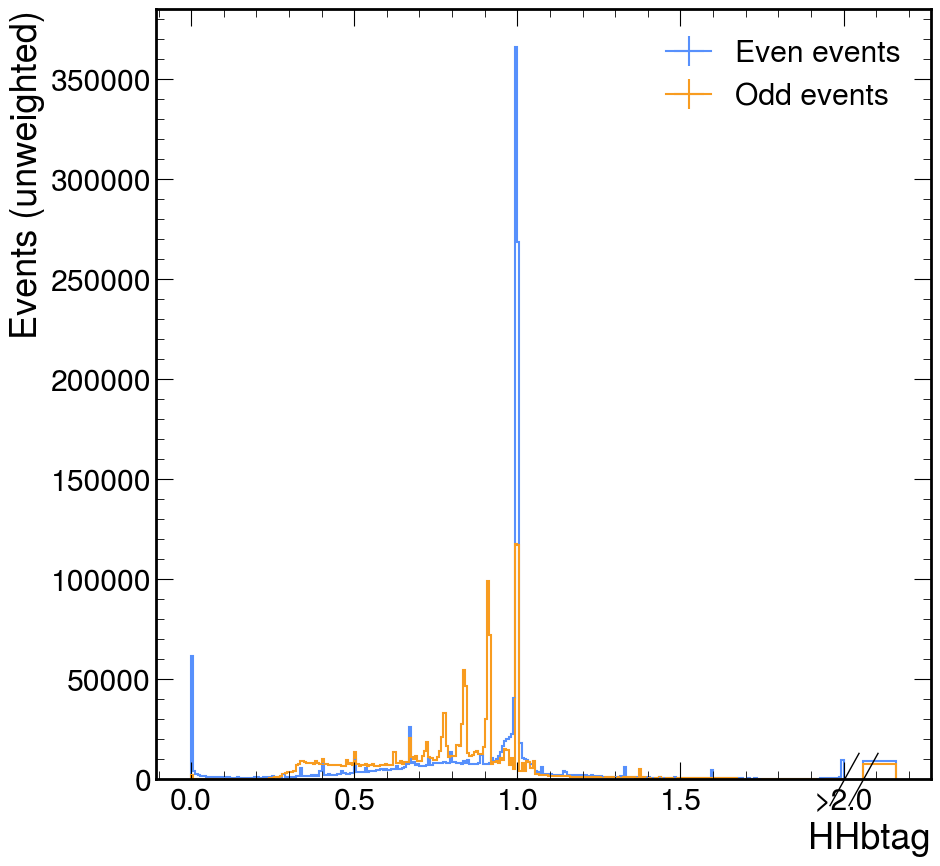

In [35]:
hhbtag_axis = hist.axis.Regular(300, 0, 2, name="HHbtag")
hhbtag_0 = hist.Hist(hhbtag_axis, name="hhbtag_0", label="Even events").fill(df[df.event%2==0].b_2_hhbtag)
hhbtag_1 = hist.Hist(hhbtag_axis, name="hhbtag_1").fill(df[df.event%2==1].b_2_hhbtag)
hep.histplot([hhbtag_0, hhbtag_1], label=["Even events", "Odd events"], flow="show")
plt.ylabel("Events (unweighted)")
plt.legend()

In [36]:
df

,event,b_2_hhbtag
0,27114218,1.889118e-07
1,27114238,5.239783e-01
2,27114317,7.211299e-01
3,27114322,3.798968e-08
4,27114360,1.000046e+00
...,...,...
3392973,409206010,4.466145e-01
3392974,409206126,5.728736e-03
3392975,409206313,8.199547e-01
3392976,429926065,6.766854e-01


In [37]:
choice = np.random.choice(df.shape[0], size=df.shape[0]//2, replace=False) 
ind = np.zeros(df.shape[0], dtype=bool)
ind[choice] = True
rest = ~ind

/opt/exp_soft/llr/python/3.11.8/el7/lib/python3.11/site-packages/mplhep/plot.py:592: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticks)


Text(0, 1, 'Events (unweighted)')

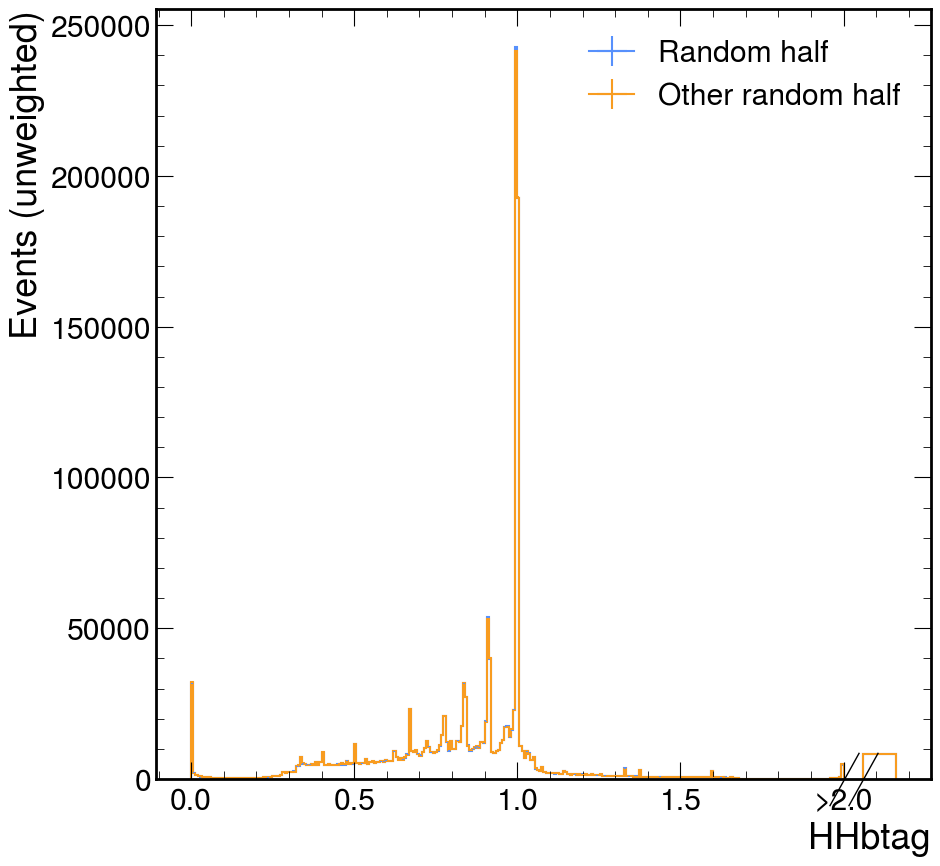

In [38]:
hhbtag_axis = hist.axis.Regular(300, 0, 2, name="HHbtag")
hhbtag_0 = hist.Hist(hhbtag_axis, name="hhbtag_0").fill(df[ind].b_2_hhbtag)
hhbtag_1 = hist.Hist(hhbtag_axis, name="hhbtag_1").fill(df[rest].b_2_hhbtag)
hep.histplot([hhbtag_0, hhbtag_1], label=["Random half", "Other random half"], flow="show")
plt.legend()
plt.ylabel("Events (unweighted)")

## DNNv2

In [40]:
f = uproot.open("/scratch/cuisset/cmt/test_hhbtag/PreprocessRDF/ul_2018_ZbbHtt_v12/tt_sl/cat_base_selection/prod_240416_hhbtagv2/data_0.root")
f["Events"].show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
bunchCrossing        | uint32_t                 | AsDtype('>u4')
event                | uint64_t                 | AsDtype('>u8')
luminosityBlock      | uint32_t                 | AsDtype('>u4')
nElectron            | int32_t                  | AsDtype('>i4')
nFatJet              | int32_t                  | AsDtype('>i4')
nGenPart             | int32_t                  | AsDtype('>i4')
nJet                 | int32_t                  | AsDtype('>i4')
nLHEPdfWeight        | int32_t                  | AsDtype('>i4')
nLHEReweightingWe... | int32_t                  | AsDtype('>i4')
nLHEScaleWeight      | int32_t                  | AsDtype('>i4')
nMuon                | int32_t                  | AsDtype('>i4')
nPSWeight            | int32_t                  | AsDtype('>i4')
nTau                 | int32_t                  | AsDtype(

In [59]:
ar = uproot.concatenate("/scratch/cuisset/cmt/test_hhbtag/PreprocessRDF/ul_2018_ZbbHtt_v12/tt_sl/cat_base_selection/prod_240416_hhbtagv2/data_0.root",
                   ["event",  "bjet2_JetIdx", "Jet_HHbtag"],
                    #aliases={"b_2_hhbtag" : "Jet_HHbtag[bjet2_JetIdx]"}
                    )
ar["b_2_hhbtag"] = ar["Jet_HHbtag"][ak.singletons(ar["bjet2_JetIdx"])][:, 0]
ar

<Array [{event: 51088003, ...}, ..., {...}] type='79562 * {event: uint64, b...'>

In [60]:
ak_v2 = uproot.concatenate(glob.glob("/scratch/cuisset/cmt/test_hhbtag/PreprocessRDF/ul_2018_ZbbHtt_v12/tt_sl/cat_base_selection/prod_240416_hhbtagv2/data_*.root"),
                           ["event",  "bjet2_JetIdx", "Jet_HHbtag"], library="ak")
ak_v2["b_2_hhbtag"] = ak_v2["Jet_HHbtag"][ak.singletons(ak_v2["bjet2_JetIdx"])][:, 0]
df_v2 = ak.to_dataframe(ak_v2[["event", "b_2_hhbtag"]])
df_v2

,event,b_2_hhbtag
entry,,
0,25556020,0.748614
1,25556012,0.968841
2,25556001,0.633532
3,25556043,0.724450
4,25556132,0.877520
...,...,...
3168547,365588916,0.925498
3168548,365588931,0.739851
3168549,365588946,0.262439


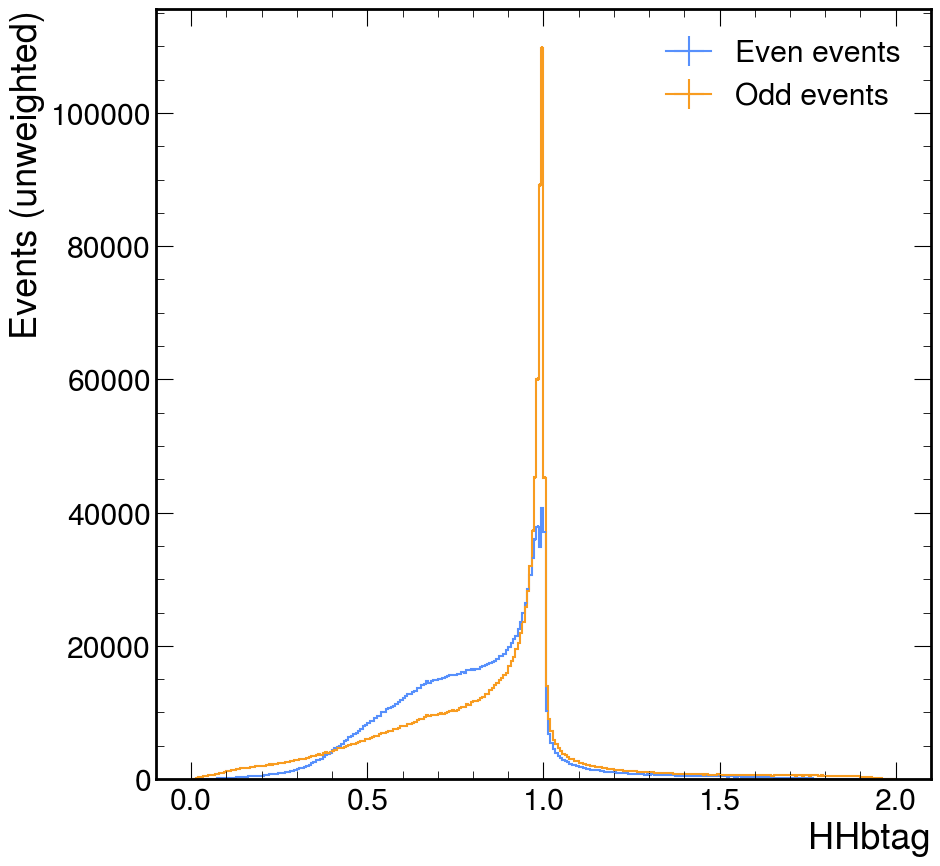

In [61]:
hhbtag_axis = hist.axis.Regular(300, 0, 2, name="HHbtag")
hhbtag_0 = hist.Hist(hhbtag_axis, name="hhbtag_0", label="Even events").fill(df_v2[df_v2.event%2==0].b_2_hhbtag)
hhbtag_1 = hist.Hist(hhbtag_axis, name="hhbtag_1").fill(df_v2[df_v2.event%2==1].b_2_hhbtag)
hep.histplot([hhbtag_0, hhbtag_1], label=["Even events", "Odd events"], flow="show")
plt.ylabel("Events (unweighted)")
plt.legend()